In [1]:
!pip install numpy
!pip install pandas

     ---------------------------------------- 14.0/14.0 MB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 10.0/10.0 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np # Importing the NumPy library and aliasing it as "np" for easier reference later in the code
import pandas as pd # Importing the Pandas library and aliasing it as "pd" for easier reference later in the code

In [4]:
url = "https://raw.githubusercontent.com/lakitha321/AndroidPhonePricePredictor/main/model%20building/prices.csv"
data = pd.read_csv(url, encoding='latin-1') # Reading the CSV file from the URL using Pandas' read_csv function, and storing the resulting DataFrame in a variable called "data"
data.head()

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999"
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Qualcomm Snapdragon 660 AIE Processor,"9,999"
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"6,999"
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Qualcomm Snapdragon 675 Processor,"10,999"
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999"


In [5]:
data.shape #the number of rows and columns

(1200, 8)

In [6]:
data.isnull() # Checking for missing values in the DataFrame and returning a Boolean DataFrame indicating whether each value is missing or not

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1195,False,False,False,False,False,False,False,False
1196,False,False,False,False,False,False,False,False
1197,False,False,False,False,False,False,False,False
1198,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum() # Counting the number of missing values in each column of the DataFrame and returning a Series with the results

ImageUrl           0
Name               0
Storage_details    0
Screen_size        0
Camera_details     0
Battery_details    0
Processor          1
Price in Rupees    0
dtype: int64

In [8]:
data.isnull().head()

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [9]:
data.info() # Displaying information about the DataFrame, including the data types of each column and the number of non-null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ImageUrl         1200 non-null   object
 1   Name             1200 non-null   object
 2   Storage_details  1200 non-null   object
 3   Screen_size      1200 non-null   object
 4   Camera_details   1200 non-null   object
 5   Battery_details  1200 non-null   object
 6   Processor        1199 non-null   object
 7   Price in Rupees  1200 non-null   object
dtypes: object(8)
memory usage: 75.1+ KB


In [10]:
# Removing rows from the DataFrame where the value in the "Processor" column is equal to the string "Processor"
data = data[data['Processor'] != 'Processor'] 

In [11]:
data.shape

(1152, 8)

In [12]:
data.isnull().sum()

ImageUrl           0
Name               0
Storage_details    0
Screen_size        0
Camera_details     0
Battery_details    0
Processor          1
Price in Rupees    0
dtype: int64

In [13]:
data.head()

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999"
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Qualcomm Snapdragon 660 AIE Processor,"9,999"
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"6,999"
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Qualcomm Snapdragon 675 Processor,"10,999"
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999"


In [14]:
# Removing rows from the DataFrame where the value in the "Processor" column is null/NaN
data = data[data.Processor.notnull()] 

In [15]:
data.shape

(1151, 8)

In [16]:
# Adding a new column to the DataFrame called "is_ram", which is True for rows where the value in the "Storage_details" column contains the string "RAM", and False otherwise
data['is_ram'] = data["Storage_details"].str.contains("RAM")

In [17]:
data.shape

(1151, 9)

In [18]:
data.head()

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999",True
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Qualcomm Snapdragon 660 AIE Processor,"9,999",True
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"6,999",True
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Qualcomm Snapdragon 675 Processor,"10,999",True
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999",True


In [19]:
# Removing rows from the DataFrame where the value in the "is_ram" column is False
data = data[data['is_ram'] != False] 

In [20]:
data.shape

(1114, 9)

In [21]:
# Removing rows from the DataFrame where the value in the "Battery_details" column does not contain the string "mAh"
data = data[data['Battery_details'].str.contains("mAh")]

In [22]:
data.shape

(1103, 9)

In [23]:
# Removing rows from the DataFrame where the value in the "Screen_size" column does not contain the string " cm "
data = data[data['Screen_size'].str.contains(" cm ")]

In [24]:
data.shape

(1103, 9)

In [25]:
# Counting the number of rows in the DataFrame where the value in the "Battery_details" column contains the string "mAh"
data['Battery_details'].str.contains("mAh").sum()

1103

In [26]:
data['Processor'].str.contains("year").sum()

46

In [27]:
# Counting the number of occurrences of each unique value in the "Processor" column
data['Processor'].value_counts()

MTK 6739 Processor                                                                                   73
Qualcomm Snapdragon 660 AIE Processor                                                                44
1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories    43
Mediatek Processor                                                                                   37
1 Year Manufacturer Warranty                                                                         36
                                                                                                     ..
Mediatek MT6750T Octa Core 1.5GHz Processor                                                           1
3 Year Manufacturing Warranty(Currently Services Not Available at South India)                        1
MTK Helio P35 (MT6765) Processor                                                                      1
Spreadtrum Quad Core 1.5GHz Processor                           

In [28]:
len(data['Processor'].value_counts())

372

In [29]:
data.head()

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999",True
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Qualcomm Snapdragon 660 AIE Processor,"9,999",True
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"6,999",True
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Qualcomm Snapdragon 675 Processor,"10,999",True
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999",True


In [30]:
"""
This function takes a string input and returns the processor name only.
If the input contains "Snapdragon", "Exynos", "MTK", "Mediatek", "MSM", or "Spreadtrum", the function will return the
corresponding processor name.
If none of these conditions are met, the function will return "Other".
"""
def replace_processor(input):
    if input.find("Snapdragon") > -1:
        return 'Snapdragon'
    elif input.find("snapdragon") > -1:
        return 'Snapdragon'
    elif input.find("Exynos") > -1:
        return 'Exynos'
    elif input.find("exynos") > -1:
        return 'Exynos'
    elif input.find("MTK") > -1:
        return 'MTK'
    elif input.find("Mediatek") > -1:
        return 'Mediatek'
    elif input.find("MSM") > -1:
        return 'MSM'
    elif input.find("Spreadtrum"):
        return 'Spreadtrum'
    elif input.find("Year") > -1:
        return 'Snapdragon'
    elif input.find("year") > -1:
        return 'Snapdragon'
    elif input.find("month") > -1:
        return 'Snapdragon'
    elif input.find("warranty") > -1:
        return 'Snapdragon'
    elif input.find("Warranty") > -1:
        return 'Snapdragon'
    else:
        return 'Other'
    
data['Processor'] = data['Processor'].apply(replace_processor)

In [31]:
data['Processor'].value_counts()

Spreadtrum    549
Snapdragon    258
MTK           141
Mediatek       75
Exynos         55
Other          16
MSM             9
Name: Processor, dtype: int64

In [32]:
data.head()

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True


In [33]:
data.shape

(1103, 9)

In [34]:
data['Storage_details'].str.contains("ROM").sum()

1103

In [35]:
data['Storage_details'].str.contains(" | ").sum()

1103

In [36]:
"""
This function takes a string input in the format "RAM y GB | Internal x GB" and returns the y GB value, which represents
the capacity of RAM. The input must be separated by the string " | " in order for the function to work
properly.
"""
def spli_ram(input):
    x = input.split(" | ")
    return (x[0])

data['RAM'] = data['Storage_details'].apply(spli_ram)

In [37]:
data.head()

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram,RAM
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True,4 GB RAM
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True,3 GB RAM
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True,4 GB RAM
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM


In [38]:
"""
This function takes a string input in the format "RAM y GB | Internal x GB" and returns the x GB value, which represents
the amount of internal storage. The input must be separated by the string " | " in order for the function to work
properly.
"""
def spli_rom(input):
    x = input.split(" | ")
    return (x[1])

data['ROM'] = data['Storage_details'].apply(spli_rom)

In [39]:
data.head()

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram,RAM,ROM
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True,4 GB RAM,64 GB ROM
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True,3 GB RAM,32 GB ROM
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True,4 GB RAM,64 GB ROM
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM


In [40]:
data['Camera_details'].str.contains(" | ").sum()

1103

In [41]:
def spli_rear_cam(input):
    x = input.split(" | ")
    return (x[0])

data['Rear_camera'] = data['Camera_details'].apply(spli_rear_cam)

In [42]:
data.head()

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram,RAM,ROM,Rear_camera
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True,4 GB RAM,64 GB ROM,48MP + 5MP
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True,3 GB RAM,32 GB ROM,12MP Rear Camera
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True,4 GB RAM,64 GB ROM,48MP + 5MP
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP


In [43]:
data['Rear_camera'].str.contains(' +').sum()

1103

In [44]:
"""
This function takes a string input representing the specifications of a rear camera in the format "x MP + y MP + z MP + ...",
where x, y, and z are the resolutions of each individual camera sensor. The function returns an integer representing the
total number of camera sensors. The input string must be separated by the string " + " in order for the function to work
properly.
"""
def get_cam_count(input):
    x = input.split("+")
    return (len(x))

data['Rear_cam_count'] = data['Rear_camera'].apply(get_cam_count)

In [45]:
data.head(20)

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram,RAM,ROM,Rear_camera,Rear_cam_count
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True,3 GB RAM,32 GB ROM,12MP Rear Camera,1
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2
5,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2
6,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2
7,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2
8,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Red, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2
9,https://rukminim1.flixcart.com/image/312/312/k...,"Realme 3i (Diamond Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2


In [46]:
data.head(20)

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram,RAM,ROM,Rear_camera,Rear_cam_count
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True,3 GB RAM,32 GB ROM,12MP Rear Camera,1
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2
5,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2
6,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2
7,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2
8,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Red, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2
9,https://rukminim1.flixcart.com/image/312/312/k...,"Realme 3i (Diamond Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2


In [47]:
data['Camera_details'].str.contains("|").sum()

1103

In [48]:
data['Camera_details'].str.contains(" 9 ").sum()

0

In [49]:
def test_(input):
    return input

data['Temp_camera_details'] = data['Camera_details'].apply(test_)

In [50]:
data.head(20)

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram,RAM,ROM,Rear_camera,Rear_cam_count,Temp_camera_details
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2,12MP + 2MP | 8MP Front Camera
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2,48MP + 5MP | 13MP Front Camera
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True,3 GB RAM,32 GB ROM,12MP Rear Camera,1,12MP Rear Camera | 8MP Front Camera
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2,48MP + 5MP | 13MP Front Camera
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2,12MP + 2MP | 8MP Front Camera
5,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera
6,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera
7,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera
8,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Red, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera
9,https://rukminim1.flixcart.com/image/312/312/k...,"Realme 3i (Diamond Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera


In [51]:
def cam_formatter(input):
    if input.find(" | ") == -1:
        return input + " | null"
    else:
        return input
    
data['Temp_camera_details'] = data['Temp_camera_details'].apply(cam_formatter)

In [52]:
data.head(20)

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram,RAM,ROM,Rear_camera,Rear_cam_count,Temp_camera_details
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2,12MP + 2MP | 8MP Front Camera
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2,48MP + 5MP | 13MP Front Camera
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True,3 GB RAM,32 GB ROM,12MP Rear Camera,1,12MP Rear Camera | 8MP Front Camera
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2,48MP + 5MP | 13MP Front Camera
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2,12MP + 2MP | 8MP Front Camera
5,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera
6,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera
7,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera
8,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Red, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera
9,https://rukminim1.flixcart.com/image/312/312/k...,"Realme 3i (Diamond Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera


In [53]:
def split_front_cam(input):
    x = input.split(" | ")
    return (x[1])

data['Front_camera'] = data['Temp_camera_details'].apply(split_front_cam)

In [54]:
data.head(20)

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram,RAM,ROM,Rear_camera,Rear_cam_count,Temp_camera_details,Front_camera
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2,12MP + 2MP | 8MP Front Camera,8MP Front Camera
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2,48MP + 5MP | 13MP Front Camera,13MP Front Camera
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True,3 GB RAM,32 GB ROM,12MP Rear Camera,1,12MP Rear Camera | 8MP Front Camera,8MP Front Camera
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2,48MP + 5MP | 13MP Front Camera,13MP Front Camera
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2,12MP + 2MP | 8MP Front Camera,8MP Front Camera
5,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera
6,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera
7,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera
8,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Red, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera
9,https://rukminim1.flixcart.com/image/312/312/k...,"Realme 3i (Diamond Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera


In [55]:
data['Rear_camera'].str.contains("MP").sum()

1103

In [56]:
data['Front_camera'].str.contains("MP").sum() + data['Front_camera'].str.contains("null").sum()

1103

In [57]:
def front_cam_formatter(input):
    if input.find("null") > -1:
        return "8MP"
    else:
        return input
    
data['Front_camera'] = data['Front_camera'].apply(front_cam_formatter)

In [58]:
data.head(20)

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram,RAM,ROM,Rear_camera,Rear_cam_count,Temp_camera_details,Front_camera
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2,12MP + 2MP | 8MP Front Camera,8MP Front Camera
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2,48MP + 5MP | 13MP Front Camera,13MP Front Camera
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True,3 GB RAM,32 GB ROM,12MP Rear Camera,1,12MP Rear Camera | 8MP Front Camera,8MP Front Camera
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2,48MP + 5MP | 13MP Front Camera,13MP Front Camera
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2,12MP + 2MP | 8MP Front Camera,8MP Front Camera
5,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera
6,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera
7,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera
8,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Red, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera
9,https://rukminim1.flixcart.com/image/312/312/k...,"Realme 3i (Diamond Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera


In [59]:
data['Screen_size'].str.contains(" cm").sum()

1103

In [60]:
def get_screen_size(input):
    x = input.split(" cm")
    return (x[0])

data['Screen_size(cm)'] = data['Screen_size'].apply(get_screen_size)

In [61]:
data.head(50)

,ImageUrl,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,is_ram,RAM,ROM,Rear_camera,Rear_cam_count,Temp_camera_details,Front_camera,Screen_size(cm)
0,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2,12MP + 2MP | 8MP Front Camera,8MP Front Camera,15.8
1,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Snapdragon,"9,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2,48MP + 5MP | 13MP Front Camera,13MP Front Camera,16.0
2,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Snapdragon,"6,999",True,3 GB RAM,32 GB ROM,12MP Rear Camera,1,12MP Rear Camera | 8MP Front Camera,8MP Front Camera,15.8
3,https://rukminim1.flixcart.com/image/312/312/j...,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Snapdragon,"10,999",True,4 GB RAM,64 GB ROM,48MP + 5MP,2,48MP + 5MP | 13MP Front Camera,13MP Front Camera,16.0
4,https://rukminim1.flixcart.com/image/312/312/k...,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Snapdragon,"7,999",True,4 GB RAM,64 GB ROM,12MP + 2MP,2,12MP + 2MP | 8MP Front Camera,8MP Front Camera,15.8
5,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera,15.8
6,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera,15.8
7,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera,15.8
8,https://rukminim1.flixcart.com/image/312/312/j...,"Realme 3i (Diamond Red, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"9,999",True,4 GB RAM,64 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera,15.8
9,https://rukminim1.flixcart.com/image/312/312/k...,"Realme 3i (Diamond Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,15.8 cm (6.22 inch) HD+ Display,13MP + 2MP | 13MP Front Camera,4230 mAh Battery,Spreadtrum,"7,999",True,3 GB RAM,32 GB ROM,13MP + 2MP,2,13MP + 2MP | 13MP Front Camera,13MP Front Camera,15.8


In [62]:
# removing object type columns which are no longer usefull
data = data.drop(columns=['ImageUrl', 'Storage_details', 'Screen_size', 'Camera_details', 'is_ram', 'Temp_camera_details'])

In [63]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm)
0,"Redmi 8 (Onyx Black, 64 GB)",5000 mAh Battery,Snapdragon,"7,999",4 GB RAM,64 GB ROM,12MP + 2MP,2,8MP Front Camera,15.8
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4000 mAh Battery,Snapdragon,"9,999",4 GB RAM,64 GB ROM,48MP + 5MP,2,13MP Front Camera,16.0
2,"Redmi 8A (Ocean Blue, 32 GB)",5000 mAh Battery,Snapdragon,"6,999",3 GB RAM,32 GB ROM,12MP Rear Camera,1,8MP Front Camera,15.8
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4000 mAh Li-polymer Battery,Snapdragon,"10,999",4 GB RAM,64 GB ROM,48MP + 5MP,2,13MP Front Camera,16.0
4,"Redmi 8 (Sapphire Blue, 64 GB)",5000 mAh Battery,Snapdragon,"7,999",4 GB RAM,64 GB ROM,12MP + 2MP,2,8MP Front Camera,15.8


In [64]:
data['Battery_details'].str.contains(" mAh").sum()

1103

In [65]:
"""
This function takes a string input representing the specifications of a phone's battery in the format "x mAh", where
x is the battery capacity in milliampere-hours. The function removes the " mAh" substring from the input string and
returns only the numeric value as a string.
"""
def battery_formatter(input):
    x = input.split(" mAh")
    return (x[0])

data['Battery_details'] = data['Battery_details'].apply(battery_formatter)

In [66]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm)
0,"Redmi 8 (Onyx Black, 64 GB)",5000,Snapdragon,"7,999",4 GB RAM,64 GB ROM,12MP + 2MP,2,8MP Front Camera,15.8
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4000,Snapdragon,"9,999",4 GB RAM,64 GB ROM,48MP + 5MP,2,13MP Front Camera,16.0
2,"Redmi 8A (Ocean Blue, 32 GB)",5000,Snapdragon,"6,999",3 GB RAM,32 GB ROM,12MP Rear Camera,1,8MP Front Camera,15.8
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4000,Snapdragon,"10,999",4 GB RAM,64 GB ROM,48MP + 5MP,2,13MP Front Camera,16.0
4,"Redmi 8 (Sapphire Blue, 64 GB)",5000,Snapdragon,"7,999",4 GB RAM,64 GB ROM,12MP + 2MP,2,8MP Front Camera,15.8


In [67]:
"""
This line of code removes any commas from the 'Price in Rupees' column and converts it to integer data type. This is
done to ensure that the data in this column is consistent and can be used for further analysis or modeling.
"""
data['Price in Rupees'] = data['Price in Rupees'].str.replace(',','').astype('int32')

In [68]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm)
0,"Redmi 8 (Onyx Black, 64 GB)",5000,Snapdragon,7999,4 GB RAM,64 GB ROM,12MP + 2MP,2,8MP Front Camera,15.8
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4000,Snapdragon,9999,4 GB RAM,64 GB ROM,48MP + 5MP,2,13MP Front Camera,16.0
2,"Redmi 8A (Ocean Blue, 32 GB)",5000,Snapdragon,6999,3 GB RAM,32 GB ROM,12MP Rear Camera,1,8MP Front Camera,15.8
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4000,Snapdragon,10999,4 GB RAM,64 GB ROM,48MP + 5MP,2,13MP Front Camera,16.0
4,"Redmi 8 (Sapphire Blue, 64 GB)",5000,Snapdragon,7999,4 GB RAM,64 GB ROM,12MP + 2MP,2,8MP Front Camera,15.8


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             1103 non-null   object
 1   Battery_details  1103 non-null   object
 2   Processor        1103 non-null   object
 3   Price in Rupees  1103 non-null   int32 
 4   RAM              1103 non-null   object
 5   ROM              1103 non-null   object
 6   Rear_camera      1103 non-null   object
 7   Rear_cam_count   1103 non-null   int64 
 8   Front_camera     1103 non-null   object
 9   Screen_size(cm)  1103 non-null   object
dtypes: int32(1), int64(1), object(8)
memory usage: 90.5+ KB


In [70]:
data.shape

(1103, 10)

In [71]:
data.head(1103)

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm)
0,"Redmi 8 (Onyx Black, 64 GB)",5000,Snapdragon,7999,4 GB RAM,64 GB ROM,12MP + 2MP,2,8MP Front Camera,15.8
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4000,Snapdragon,9999,4 GB RAM,64 GB ROM,48MP + 5MP,2,13MP Front Camera,16.0
2,"Redmi 8A (Ocean Blue, 32 GB)",5000,Snapdragon,6999,3 GB RAM,32 GB ROM,12MP Rear Camera,1,8MP Front Camera,15.8
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4000,Snapdragon,10999,4 GB RAM,64 GB ROM,48MP + 5MP,2,13MP Front Camera,16.0
4,"Redmi 8 (Sapphire Blue, 64 GB)",5000,Snapdragon,7999,4 GB RAM,64 GB ROM,12MP + 2MP,2,8MP Front Camera,15.8
...,...,...,...,...,...,...,...,...,...,...
1195,"Samsung Galaxy J2 Core (Black, 8 GB)",2600,Exynos,6200,1 GB RAM,8 GB ROM,8MP Rear Camera,1,5MP Front Camera,12.7
1196,"Samsung Galaxy A10 (Red, 32 GB)",3400,Exynos,8700,2 GB RAM,32 GB ROM,13MP Rear Camera,1,5MP Front Camera,15.75
1197,"Comio C1 Pro (Sunrise Gold, 16 GB)",2500,Spreadtrum,4340,1.5 GB RAM,16 GB ROM,8MP Rear Camera,1,5MP Front Camera,12.7
1198,"Comio C1 Pro (Metallic Grey, 16 GB)",2500,Spreadtrum,4999,1.5 GB RAM,16 GB ROM,8MP Rear Camera,1,5MP Front Camera,12.7


In [72]:
"""
Uses a lambda function to extract the numeric value of RAM from the 'RAM' column of the 'data'
dataframe. The function splits the string by whitespace and takes the first element, which represents the RAM capacity
in gigabytes. The result is assigned to the 'RAM' column, replacing the original values which included 'GB'.
"""
data['RAM'] = data['RAM'].apply(lambda x:" ".join(x.split()[0:1]))

In [73]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm)
0,"Redmi 8 (Onyx Black, 64 GB)",5000,Snapdragon,7999,4,64 GB ROM,12MP + 2MP,2,8MP Front Camera,15.8
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4000,Snapdragon,9999,4,64 GB ROM,48MP + 5MP,2,13MP Front Camera,16.0
2,"Redmi 8A (Ocean Blue, 32 GB)",5000,Snapdragon,6999,3,32 GB ROM,12MP Rear Camera,1,8MP Front Camera,15.8
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4000,Snapdragon,10999,4,64 GB ROM,48MP + 5MP,2,13MP Front Camera,16.0
4,"Redmi 8 (Sapphire Blue, 64 GB)",5000,Snapdragon,7999,4,64 GB ROM,12MP + 2MP,2,8MP Front Camera,15.8


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             1103 non-null   object
 1   Battery_details  1103 non-null   object
 2   Processor        1103 non-null   object
 3   Price in Rupees  1103 non-null   int32 
 4   RAM              1103 non-null   object
 5   ROM              1103 non-null   object
 6   Rear_camera      1103 non-null   object
 7   Rear_cam_count   1103 non-null   int64 
 8   Front_camera     1103 non-null   object
 9   Screen_size(cm)  1103 non-null   object
dtypes: int32(1), int64(1), object(8)
memory usage: 90.5+ KB


In [75]:
"""
This line of code casts the 'RAM' column to the 'float32' data type. This is necessary to ensure that the 'RAM'
column is represented as a numeric variable, which is necessary for modeling.
"""
data['RAM'] = data['RAM'].astype('float32')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1103 non-null   object 
 1   Battery_details  1103 non-null   object 
 2   Processor        1103 non-null   object 
 3   Price in Rupees  1103 non-null   int32  
 4   RAM              1103 non-null   float32
 5   ROM              1103 non-null   object 
 6   Rear_camera      1103 non-null   object 
 7   Rear_cam_count   1103 non-null   int64  
 8   Front_camera     1103 non-null   object 
 9   Screen_size(cm)  1103 non-null   object 
dtypes: float32(1), int32(1), int64(1), object(7)
memory usage: 86.2+ KB


In [77]:
data['ROM'] = data['ROM'].str.replace('GB',' ')

In [78]:
data = data[data['Name'] != 'InFocus Turbo 5 (Gold, 16$$GB)']

In [79]:
data['ROM'] = data['ROM'].apply(lambda x:" ".join(x.split()[0:1])).astype('float32')

In [80]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm)
0,"Redmi 8 (Onyx Black, 64 GB)",5000,Snapdragon,7999,4.0,64.0,12MP + 2MP,2,8MP Front Camera,15.8
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4000,Snapdragon,9999,4.0,64.0,48MP + 5MP,2,13MP Front Camera,16.0
2,"Redmi 8A (Ocean Blue, 32 GB)",5000,Snapdragon,6999,3.0,32.0,12MP Rear Camera,1,8MP Front Camera,15.8
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4000,Snapdragon,10999,4.0,64.0,48MP + 5MP,2,13MP Front Camera,16.0
4,"Redmi 8 (Sapphire Blue, 64 GB)",5000,Snapdragon,7999,4.0,64.0,12MP + 2MP,2,8MP Front Camera,15.8


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1102 non-null   object 
 1   Battery_details  1102 non-null   object 
 2   Processor        1102 non-null   object 
 3   Price in Rupees  1102 non-null   int32  
 4   RAM              1102 non-null   float32
 5   ROM              1102 non-null   float32
 6   Rear_camera      1102 non-null   object 
 7   Rear_cam_count   1102 non-null   int64  
 8   Front_camera     1102 non-null   object 
 9   Screen_size(cm)  1102 non-null   object 
dtypes: float32(2), int32(1), int64(1), object(6)
memory usage: 81.8+ KB


In [82]:
data['Battery_details'] = data['Battery_details'].astype('int32')

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1102 non-null   object 
 1   Battery_details  1102 non-null   int32  
 2   Processor        1102 non-null   object 
 3   Price in Rupees  1102 non-null   int32  
 4   RAM              1102 non-null   float32
 5   ROM              1102 non-null   float32
 6   Rear_camera      1102 non-null   object 
 7   Rear_cam_count   1102 non-null   int64  
 8   Front_camera     1102 non-null   object 
 9   Screen_size(cm)  1102 non-null   object 
dtypes: float32(2), int32(2), int64(1), object(5)
memory usage: 77.5+ KB


In [84]:
data['Rear_camera'] = data['Rear_camera'].apply(lambda x:" ".join(x.split()[0:1]))

In [85]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm)
0,"Redmi 8 (Onyx Black, 64 GB)",5000,Snapdragon,7999,4.0,64.0,12MP,2,8MP Front Camera,15.8
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4000,Snapdragon,9999,4.0,64.0,48MP,2,13MP Front Camera,16.0
2,"Redmi 8A (Ocean Blue, 32 GB)",5000,Snapdragon,6999,3.0,32.0,12MP,1,8MP Front Camera,15.8
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4000,Snapdragon,10999,4.0,64.0,48MP,2,13MP Front Camera,16.0
4,"Redmi 8 (Sapphire Blue, 64 GB)",5000,Snapdragon,7999,4.0,64.0,12MP,2,8MP Front Camera,15.8


In [86]:
data['Rear_camera'] = data['Rear_camera'].str.replace('MP','').astype('float32')

In [87]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm)
0,"Redmi 8 (Onyx Black, 64 GB)",5000,Snapdragon,7999,4.0,64.0,12.0,2,8MP Front Camera,15.8
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4000,Snapdragon,9999,4.0,64.0,48.0,2,13MP Front Camera,16.0
2,"Redmi 8A (Ocean Blue, 32 GB)",5000,Snapdragon,6999,3.0,32.0,12.0,1,8MP Front Camera,15.8
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4000,Snapdragon,10999,4.0,64.0,48.0,2,13MP Front Camera,16.0
4,"Redmi 8 (Sapphire Blue, 64 GB)",5000,Snapdragon,7999,4.0,64.0,12.0,2,8MP Front Camera,15.8


In [88]:
data['Front_camera'] = data['Front_camera'].apply(lambda x:" ".join(x.split()[0:1]))

In [89]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm)
0,"Redmi 8 (Onyx Black, 64 GB)",5000,Snapdragon,7999,4.0,64.0,12.0,2,8MP,15.8
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4000,Snapdragon,9999,4.0,64.0,48.0,2,13MP,16.0
2,"Redmi 8A (Ocean Blue, 32 GB)",5000,Snapdragon,6999,3.0,32.0,12.0,1,8MP,15.8
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4000,Snapdragon,10999,4.0,64.0,48.0,2,13MP,16.0
4,"Redmi 8 (Sapphire Blue, 64 GB)",5000,Snapdragon,7999,4.0,64.0,12.0,2,8MP,15.8


In [90]:
data['Front_camera'] = data['Front_camera'].apply(lambda x:"MP".join(x.split()[0:1]))

In [91]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm)
0,"Redmi 8 (Onyx Black, 64 GB)",5000,Snapdragon,7999,4.0,64.0,12.0,2,8MP,15.8
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4000,Snapdragon,9999,4.0,64.0,48.0,2,13MP,16.0
2,"Redmi 8A (Ocean Blue, 32 GB)",5000,Snapdragon,6999,3.0,32.0,12.0,1,8MP,15.8
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4000,Snapdragon,10999,4.0,64.0,48.0,2,13MP,16.0
4,"Redmi 8 (Sapphire Blue, 64 GB)",5000,Snapdragon,7999,4.0,64.0,12.0,2,8MP,15.8


In [92]:
data.isnull().sum()

Name               0
Battery_details    0
Processor          0
Price in Rupees    0
RAM                0
ROM                0
Rear_camera        0
Rear_cam_count     0
Front_camera       0
Screen_size(cm)    0
dtype: int64

In [93]:
data['Front_camera'].str.contains("MP").sum()

1102

In [94]:
data['Front_camera'] = data['Front_camera'].str.replace('MP','')

In [99]:
data['Front_camera'] = data['Front_camera'].astype('float32')

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1102 non-null   object 
 1   Battery_details  1102 non-null   int32  
 2   Processor        1102 non-null   object 
 3   Price in Rupees  1102 non-null   int32  
 4   RAM              1102 non-null   float32
 5   ROM              1102 non-null   float32
 6   Rear_camera      1102 non-null   float32
 7   Rear_cam_count   1102 non-null   int64  
 8   Front_camera     1102 non-null   float32
 9   Screen_size(cm)  1102 non-null   float32
dtypes: float32(5), int32(2), int64(1), object(2)
memory usage: 64.6+ KB


In [101]:
data['Screen_size(cm)'] = data['Screen_size(cm)'].astype('float32')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1102 non-null   object 
 1   Battery_details  1102 non-null   int32  
 2   Processor        1102 non-null   object 
 3   Price in Rupees  1102 non-null   int32  
 4   RAM              1102 non-null   float32
 5   ROM              1102 non-null   float32
 6   Rear_camera      1102 non-null   float32
 7   Rear_cam_count   1102 non-null   int64  
 8   Front_camera     1102 non-null   float32
 9   Screen_size(cm)  1102 non-null   float32
dtypes: float32(5), int32(2), int64(1), object(2)
memory usage: 64.6+ KB


In [103]:
data['Name'].value_counts()

Kult Ambition (Black, 32 GB)                 38
Kult Impulse (Black, 32 GB)                  37
Mi A2 (Red, 128 GB)                          37
Kult Impulse (Blue, 32 GB)                   35
Karbonn Aura Power 4G+ (Champagne, 16 GB)    29
                                             ..
Honor Holly 3 (Black, 16 GB)                  1
Honor 8 Smart (White, 16 GB)                  1
Lava Z92 (Ocean Blue, 32 GB)                  1
OPPO F1 Plus (Gold, 64 GB)                    1
Honor Holly 3 (Gold, 32 GB)                   1
Name: Name, Length: 900, dtype: int64

In [104]:
len(data['Name'].value_counts())

900

In [105]:
data['Name'] = data['Name'].apply(lambda x:" ".join(x.split()[0:1]))

In [106]:
len(data['Name'].value_counts())

91

In [107]:
data['Name'].value_counts()

Kult        110
Samsung     105
Redmi        63
Vivo         58
Karbonn      56
           ... 
Uinitel       1
Kenxinda      1
SSKY          1
Sony          1
HPL           1
Name: Name, Length: 91, dtype: int64

In [108]:
def test_(input):
    return input

data['Temp_name'] = data['Name'].apply(test_)

In [109]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm),Temp_name
0,Redmi,5000,Snapdragon,7999,4.0,64.0,12.0,2,8.0,15.8,Redmi
1,Redmi,4000,Snapdragon,9999,4.0,64.0,48.0,2,13.0,16.0,Redmi
2,Redmi,5000,Snapdragon,6999,3.0,32.0,12.0,1,8.0,15.8,Redmi
3,Redmi,4000,Snapdragon,10999,4.0,64.0,48.0,2,13.0,16.0,Redmi
4,Redmi,5000,Snapdragon,7999,4.0,64.0,12.0,2,8.0,15.8,Redmi


In [110]:
"""
This line applies the function format_name() to the 'Name' column of the DataFrame. The format_name() function
replaces certain brand names with 'Other'. This is done to group less popular brands together and reduce the
number of unique values in the 'Name' column, which can simplify the modeling process.
"""
def format_name(input):
    if input == 'Uinitel' or input == 'Kenxinda' or input == 'SSKY' or input == 'Sony' or input == 'HPL':
        return 'Other'

data['Name'] = data['Name'].apply(format_name)

In [111]:
data['Name'].value_counts()

Other    5
Name: Name, dtype: int64

In [112]:
def test_(input):
    return input

data['Brand'] = data['Temp_name'].apply(test_)

In [113]:
data.head()

,Name,Battery_details,Processor,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm),Temp_name,Brand
0,None,5000,Snapdragon,7999,4.0,64.0,12.0,2,8.0,15.8,Redmi,Redmi
1,None,4000,Snapdragon,9999,4.0,64.0,48.0,2,13.0,16.0,Redmi,Redmi
2,None,5000,Snapdragon,6999,3.0,32.0,12.0,1,8.0,15.8,Redmi,Redmi
3,None,4000,Snapdragon,10999,4.0,64.0,48.0,2,13.0,16.0,Redmi,Redmi
4,None,5000,Snapdragon,7999,4.0,64.0,12.0,2,8.0,15.8,Redmi,Redmi


In [114]:
def format_name(input):
    if input == 'Uinitel' or input == 'Kenxinda' or input == 'SSKY' or input == 'Sony' or input == 'HPL':
        return 'Other'
    else:
        return input

data['Brand'] = data['Brand'].apply(format_name)

In [115]:
data['Brand'].value_counts()

Kult       110
Samsung    105
Redmi       63
Vivo        58
Karbonn     56
          ... 
Rage         1
ITEL         1
YUHO         1
vivo         1
Nubia        1
Name: Brand, Length: 87, dtype: int64

In [116]:
def format_name(input):
    if input == 'Rage' or input == 'ITEL' or input == 'YUHO' or input == 'Nubia':
        return 'Other'
    elif input == 'vivo':
        return 'Vivo'
    else:
        return input

data['Brand'] = data['Brand'].apply(format_name)

In [117]:
data['Brand'].value_counts()

Kult         110
Samsung      105
Redmi         63
Vivo          59
Karbonn       56
            ... 
Leagoo         1
Swipe          1
Virat          1
Microsoft      1
Lychee         1
Name: Brand, Length: 82, dtype: int64

In [118]:
def format_name(input):
    if input == 'Leagoo' or input == 'Swipe' or input == 'Virat' or input == 'Microsoft' or input == 'Lychee':
        return 'Other'
    else:
        return input

data['Brand'] = data['Brand'].apply(format_name)

In [119]:
data['Brand'].value_counts()

Kult        110
Samsung     105
Redmi        63
Vivo         59
Karbonn      56
           ... 
Smartron      1
Kekai         1
Scosmos       1
TP-Link       1
Okwu          1
Name: Brand, Length: 77, dtype: int64

In [120]:
def format_name(input):
    if input == 'Smartron' or input == 'Kekai' or input == 'Scosmos' or input == 'TP-Link' or input == 'Okwu':
        return 'Other'
    else:
        return input

data['Brand'] = data['Brand'].apply(format_name)

In [121]:
data['Brand'].value_counts()

Kult       110
Samsung    105
Redmi       63
Vivo        59
Karbonn     56
          ... 
Trio         1
HP           1
Lemon        1
Reach        1
ZIOX         1
Name: Brand, Length: 72, dtype: int64

In [122]:
def format_name(input):
    if input == 'Trio' or input == 'HP' or input == 'Lemon' or input == 'Reach' or input == 'ZIOX':
        return 'Other'
    else:
        return input

data['Brand'] = data['Brand'].apply(format_name)

In [123]:
data['Brand'].value_counts()

Kult        110
Samsung     105
Redmi        63
Vivo         59
Karbonn      56
           ... 
Lephone       2
Meizu         2
Motorola      2
SCOSMOS       2
Spice         2
Name: Brand, Length: 67, dtype: int64

In [124]:
def format_name(input):
    if input == 'Lephone' or input == 'Meizu' or input == 'Motorola' or input == 'SCOSMOS' or input == 'Spice':
        return 'Other'
    else:
        return input

data['Brand'] = data['Brand'].apply(format_name)

In [125]:
data['Brand'].value_counts()

Kult       110
Samsung    105
Redmi       63
Vivo        59
Karbonn     56
          ... 
Ismart       2
XCCESS       2
M-tech       2
tecno        2
Black        2
Name: Brand, Length: 62, dtype: int64

In [126]:
len(data['Brand'].value_counts())

62

In [127]:
def format_name(input):
    if input == 'Ismart' or input == 'XCCESS' or input == 'M-tech' or input == 'tecno' or input == 'Black':
        return 'Other'
    else:
        return input

data['Brand'] = data['Brand'].apply(format_name)

In [128]:
data['Brand'].value_counts()

Kult         110
Samsung      105
Redmi         63
Vivo          59
Karbonn       56
OPPO          46
Mi            45
Other         44
Micromax      43
Realme        42
Gionee        31
Panasonic     30
Nokia         26
Honor         26
Lenovo        21
Moto          21
Tecno         21
Lava          20
LG            16
LYF           15
Itel          14
Ziox          14
Asus          14
Mobiistar     14
Intex         13
InFocus       13
I             13
Coolpad       11
Tashan        10
XOLO          10
Yu            10
Comio          9
ZOPO           9
Yuho           9
OnePlus        9
iVooMi         8
Infinix        7
Alcatel        7
VOTO           6
Celkon         6
Huawei         5
Google         5
JIVI           4
Homtom         4
nuvo           4
POCO           4
Ssky           4
Forme          4
Seeken         3
Voto           3
Zen            3
Centric        3
HTC            2
Nuu            2
Tiitan         2
Jivi           2
Do             2
Name: Brand, dtype: int64

In [129]:
def format_name(input):
    if input == 'Intex' or input == 'InFocus' or input == 'I' or input == 'Coolpad' or input == 'Tashan' or input == 'XOLO' or input == 'Yu' or input == 'Comio' or input == 'ZOPO' or input == 'Yuho' or input == 'iVooMi' or input == 'Infinix' or input == 'Alcatel' or input == 'XCCESS' or input == 'Alcatel' or input == 'VOTO' or input == 'Celkon':
        return 'Other'
    else:
        return input

data['Brand'] = data['Brand'].apply(format_name)

In [130]:
data['Brand'].value_counts()

Other        185
Kult         110
Samsung      105
Redmi         63
Vivo          59
Karbonn       56
OPPO          46
Mi            45
Micromax      43
Realme        42
Gionee        31
Panasonic     30
Nokia         26
Honor         26
Tecno         21
Lenovo        21
Moto          21
Lava          20
LG            16
LYF           15
Ziox          14
Mobiistar     14
Itel          14
Asus          14
OnePlus        9
Huawei         5
Google         5
Ssky           4
POCO           4
JIVI           4
Forme          4
Homtom         4
nuvo           4
Zen            3
Centric        3
Seeken         3
Voto           3
Nuu            2
Do             2
Tiitan         2
Jivi           2
HTC            2
Name: Brand, dtype: int64

In [131]:
def format_name(input):
    if input == 'Ssky' or input == 'POCO' or input == 'JIVI' or input == 'Forme' or input == 'Homtom' or input == 'Homtom' or input == 'Zen' or input == 'Centric' or input == 'Seeken' or input == 'Voto' or input == 'Nuu' or input == 'Do' or input == 'Tiitan' or input == 'Jivi' or input == 'HTC':
        return 'Other'
    else:
        return input

data['Brand'] = data['Brand'].apply(format_name)

In [132]:
data['Brand'].value_counts()

Other        227
Kult         110
Samsung      105
Redmi         63
Vivo          59
Karbonn       56
OPPO          46
Mi            45
Micromax      43
Realme        42
Gionee        31
Panasonic     30
Nokia         26
Honor         26
Moto          21
Lenovo        21
Tecno         21
Lava          20
LG            16
LYF           15
Ziox          14
Asus          14
Mobiistar     14
Itel          14
OnePlus        9
Google         5
Huawei         5
nuvo           4
Name: Brand, dtype: int64

In [133]:
def format_name(input):
    if input == 'nuvo' or input == 'HP' or input == 'Lemon' or input == 'Reach' or input == 'ZIOX':
        return 'Other'
    else:
        return input

data['Brand'] = data['Brand'].apply(format_name)

In [134]:
data['Brand'].value_counts()

Other        231
Kult         110
Samsung      105
Redmi         63
Vivo          59
Karbonn       56
OPPO          46
Mi            45
Micromax      43
Realme        42
Gionee        31
Panasonic     30
Nokia         26
Honor         26
Moto          21
Lenovo        21
Tecno         21
Lava          20
LG            16
LYF           15
Itel          14
Ziox          14
Mobiistar     14
Asus          14
OnePlus        9
Google         5
Huawei         5
Name: Brand, dtype: int64

In [135]:
len(data['Brand'].value_counts())

27

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5 non-null      object 
 1   Battery_details  1102 non-null   int32  
 2   Processor        1102 non-null   object 
 3   Price in Rupees  1102 non-null   int32  
 4   RAM              1102 non-null   float32
 5   ROM              1102 non-null   float32
 6   Rear_camera      1102 non-null   float32
 7   Rear_cam_count   1102 non-null   int64  
 8   Front_camera     1102 non-null   float32
 9   Screen_size(cm)  1102 non-null   float32
 10  Temp_name        1102 non-null   object 
 11  Brand            1102 non-null   object 
dtypes: float32(5), int32(2), int64(1), object(4)
memory usage: 81.8+ KB


In [137]:
data = data.drop(columns=['Name', 'Temp_name'])

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Battery_details  1102 non-null   int32  
 1   Processor        1102 non-null   object 
 2   Price in Rupees  1102 non-null   int32  
 3   RAM              1102 non-null   float32
 4   ROM              1102 non-null   float32
 5   Rear_camera      1102 non-null   float32
 6   Rear_cam_count   1102 non-null   int64  
 7   Front_camera     1102 non-null   float32
 8   Screen_size(cm)  1102 non-null   float32
 9   Brand            1102 non-null   object 
dtypes: float32(5), int32(2), int64(1), object(2)
memory usage: 64.6+ KB


In [139]:
data.shape

(1102, 10)

In [140]:
data = pd.get_dummies(data)

In [141]:
data.shape

(1102, 42)

In [142]:
data.head()

,Battery_details,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm),Processor_Exynos,Processor_MSM,...,Brand_OPPO,Brand_OnePlus,Brand_Other,Brand_Panasonic,Brand_Realme,Brand_Redmi,Brand_Samsung,Brand_Tecno,Brand_Vivo,Brand_Ziox
0,5000,7999,4.0,64.0,12.0,2,8.0,15.8,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4000,9999,4.0,64.0,48.0,2,13.0,16.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5000,6999,3.0,32.0,12.0,1,8.0,15.8,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4000,10999,4.0,64.0,48.0,2,13.0,16.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5000,7999,4.0,64.0,12.0,2,8.0,15.8,0,0,...,0,0,0,0,0,1,0,0,0,0


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1199
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery_details       1102 non-null   int32  
 1   Price in Rupees       1102 non-null   int32  
 2   RAM                   1102 non-null   float32
 3   ROM                   1102 non-null   float32
 4   Rear_camera           1102 non-null   float32
 5   Rear_cam_count        1102 non-null   int64  
 6   Front_camera          1102 non-null   float32
 7   Screen_size(cm)       1102 non-null   float32
 8   Processor_Exynos      1102 non-null   uint8  
 9   Processor_MSM         1102 non-null   uint8  
 10  Processor_MTK         1102 non-null   uint8  
 11  Processor_Mediatek    1102 non-null   uint8  
 12  Processor_Other       1102 non-null   uint8  
 13  Processor_Snapdragon  1102 non-null   uint8  
 14  Processor_Spreadtrum  1102 non-null   uint8  
 15  Brand_Asus           

In [144]:
"""
This line of code creates two new variables x and y, where x is a dataframe containing all the columns in 'data'
except for the 'Price in Rupees' column, and y is a series containing the 'Price in Rupees' column from 'data'.
This is done to separate the target variable (y) from the features (x), which is necessary for building a
supervised machine learning model.
"""
x = data.drop('Price in Rupees', axis=1)
y = data['Price in Rupees']

In [150]:
!pip install scikit-learn

     ---------------------------------------- 7.1/7.1 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 34.1/34.1 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
import sklearn

In [153]:
"""
The train_test_split function from sklearn.model_selection module is used here to split the 
data into training and testing sets. x and y are the feature and target variables respectively. 
The test_size parameter is set to 0.25, which means that the testing set will contain 25% of the data, 
while the remaining 75% will be used for training. The training and testing sets will be assigned 
to x_train, x_test, y_train, and y_test variables.
"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [154]:
x_train.shape

(826, 41)

In [155]:
x_test.shape

(276, 41)

In [157]:
"""
This function fits a given model with training data and calculates the accuracy score of the model using test data.
The accuracy score is printed to the console along with the model name.

Parameters:
    model (object): A machine learning model object that has 'fit' and 'score' methods.
"""
def get_model_accuracy(model):
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    print(str(model) + ' => ' + str(accuracy))

In [170]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
get_model_accuracy(lr)

from sklearn.linear_model import Ridge
rg = Ridge()
get_model_accuracy(rg)

from sklearn.linear_model import Lasso
ls = Lasso()
get_model_accuracy(ls)

from sklearn.linear_model import ElasticNet
en = ElasticNet()
get_model_accuracy(en)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
get_model_accuracy(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
get_model_accuracy(rf)

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
get_model_accuracy(gb)

from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
get_model_accuracy(ab)

from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
get_model_accuracy(br)

from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
get_model_accuracy(et)

LinearRegression() => 0.4967976497558406
Ridge() => 0.5076865156215209
Lasso() => 0.49724866554229186
ElasticNet() => 0.3503920554084603
DecisionTreeRegressor() => 0.6035710411310005
RandomForestRegressor() => 0.7014377051514322
GradientBoostingRegressor() => 0.7644321622694705
AdaBoostRegressor() => 0.4046962946908186
BaggingRegressor() => 0.6866320577881422
ExtraTreesRegressor() => 0.7357849283121592


In [195]:
"""
This code performs a grid search for the best hyperparameters for a random forest regression model. 
The rf_parameters dictionary specifies the different values for n_estimators and criterion that will be tested. 
GridSearchCV is used to fit the model using all combinations of hyperparameters specified and returns the best model 
based on the given scoring method. Finally, rf_best_model stores the best model with optimal hyperparameters that were 
found during grid search
"""
from sklearn.model_selection import GridSearchCV

rf_parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','friedman_mse','poisson']}

rf_grid_obj = GridSearchCV(estimator=rf, param_grid=rf_parameters)

rf_grid_fit = rf_grid_obj.fit(x_train, y_train)

rf_best_model = rf_grid_fit.best_estimator_

rf_best_model

RandomForestRegressor(n_estimators=50)

In [196]:
rf_best_model.score(x_test, y_test)

0.713481086753665

In [191]:
gb_parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','friedman_mse'],
                'loss':['absolute_error','huber','quantile'],
                'learning_rate':[0.1, 0.5, 0.9]}

gb_grid_obj = GridSearchCV(estimator=gb, param_grid=gb_parameters)

gb_grid_fit = gb_grid_obj.fit(x_train, y_train)

gb_best_model = gb_grid_fit.best_estimator_

gb_best_model

GradientBoostingRegressor(learning_rate=0.5, loss='huber')

In [192]:
gb_best_model.score(x_test, y_test)

0.8092738068780152

In [193]:
et_parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','friedman_mse','poisson']}

et_grid_obj = GridSearchCV(estimator=et, param_grid=et_parameters)

et_grid_fit = et_grid_obj.fit(x_train, y_train)

et_best_model = et_grid_fit.best_estimator_

et_best_model

ExtraTreesRegressor(criterion='absolute_error')

In [194]:
et_best_model.score(x_test, y_test)

0.7513825750987977

In [199]:
br_parameters = {"n_estimators": [10, 20, 50]}

br_grid_obj = GridSearchCV(estimator=br, param_grid=br_parameters)

br_grid_fit = br_grid_obj.fit(x_train, y_train)

br_best_model = br_grid_fit.best_estimator_

br_best_model.score(x_test, y_test)

0.701911474467809

In [201]:
import pickle
"""
uses the pickle module in Python to save the trained rf_best_model to a file named 'rfPredictor.pickle' 
in binary mode ('wb'). This will allow us to load the model back into memory at a later time without having to retrain it.
"""
with open('rfPredictor.pickle', 'wb') as file:
    pickle.dump(rf_best_model, file)
    
with open('gbPredictor.pickle', 'wb') as file:
    pickle.dump(gb_best_model, file)

with open('etPredictor.pickle', 'wb') as file:
    pickle.dump(et_best_model, file)
    
with open('brPredictor.pickle', 'wb') as file:
    pickle.dump(br_best_model, file)

In [202]:
x_train.columns

Index(['Battery_details', 'RAM', 'ROM', 'Rear_camera', 'Rear_cam_count',
       'Front_camera', 'Screen_size(cm)', 'Processor_Exynos', 'Processor_MSM',
       'Processor_MTK', 'Processor_Mediatek', 'Processor_Other',
       'Processor_Snapdragon', 'Processor_Spreadtrum', 'Brand_Asus',
       'Brand_Gionee', 'Brand_Google', 'Brand_Honor', 'Brand_Huawei',
       'Brand_Itel', 'Brand_Karbonn', 'Brand_Kult', 'Brand_LG', 'Brand_LYF',
       'Brand_Lava', 'Brand_Lenovo', 'Brand_Mi', 'Brand_Micromax',
       'Brand_Mobiistar', 'Brand_Moto', 'Brand_Nokia', 'Brand_OPPO',
       'Brand_OnePlus', 'Brand_Other', 'Brand_Panasonic', 'Brand_Realme',
       'Brand_Redmi', 'Brand_Samsung', 'Brand_Tecno', 'Brand_Vivo',
       'Brand_Ziox'],
      dtype='object')

In [203]:
data.head()

,Battery_details,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm),Processor_Exynos,Processor_MSM,...,Brand_OPPO,Brand_OnePlus,Brand_Other,Brand_Panasonic,Brand_Realme,Brand_Redmi,Brand_Samsung,Brand_Tecno,Brand_Vivo,Brand_Ziox
0,5000,7999,4.0,64.0,12.0,2,8.0,15.8,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4000,9999,4.0,64.0,48.0,2,13.0,16.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5000,6999,3.0,32.0,12.0,1,8.0,15.8,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4000,10999,4.0,64.0,48.0,2,13.0,16.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5000,7999,4.0,64.0,12.0,2,8.0,15.8,0,0,...,0,0,0,0,0,1,0,0,0,0


In [207]:
temp_arr = [5000, 4.0, 32.0, 12.0, 2, 6.0, 15.8, 1, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
rf_best_model.predict([temp_arr])

E:\4th Yr\ML\project\model\env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([22608.34])

In [208]:
gb_best_model.predict([temp_arr])

E:\4th Yr\ML\project\model\env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([23898.15776976])

In [209]:
et_best_model.predict([temp_arr])

E:\4th Yr\ML\project\model\env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([25004.8])

In [210]:
br_best_model.predict([temp_arr])

E:\4th Yr\ML\project\model\env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([21650.52166667])

In [216]:
data.corr()['Price in Rupees']

Battery_details         0.254348
Price in Rupees         1.000000
RAM                    -0.101637
ROM                     0.583536
Rear_camera             0.411257
Rear_cam_count          0.406247
Front_camera            0.313360
Screen_size(cm)         0.424289
Processor_Exynos        0.213773
Processor_MSM          -0.020400
Processor_MTK          -0.147686
Processor_Mediatek     -0.097717
Processor_Other        -0.058858
Processor_Snapdragon    0.252158
Processor_Spreadtrum   -0.141019
Brand_Asus             -0.004728
Brand_Gionee           -0.051319
Brand_Google            0.280778
Brand_Honor             0.056609
Brand_Huawei            0.100369
Brand_Itel             -0.062436
Brand_Karbonn          -0.132909
Brand_Kult             -0.191362
Brand_LG                0.134004
Brand_LYF              -0.054225
Brand_Lava             -0.052313
Brand_Lenovo           -0.020292
Brand_Mi                0.005903
Brand_Micromax         -0.089015
Brand_Mobiistar        -0.060558
Brand_Moto

In [214]:
data

,Battery_details,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm),Processor_Exynos,Processor_MSM,...,Brand_OPPO,Brand_OnePlus,Brand_Other,Brand_Panasonic,Brand_Realme,Brand_Redmi,Brand_Samsung,Brand_Tecno,Brand_Vivo,Brand_Ziox
0,5000,7999,4.0,64.0,12.0,2,8.0,15.80,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4000,9999,4.0,64.0,48.0,2,13.0,16.00,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5000,6999,3.0,32.0,12.0,1,8.0,15.80,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4000,10999,4.0,64.0,48.0,2,13.0,16.00,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5000,7999,4.0,64.0,12.0,2,8.0,15.80,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2600,6200,1.0,8.0,8.0,1,5.0,12.70,1,0,...,0,0,0,0,0,0,1,0,0,0
1196,3400,8700,2.0,32.0,13.0,1,5.0,15.75,1,0,...,0,0,0,0,0,0,1,0,0,0
1197,2500,4340,1.5,16.0,8.0,1,5.0,12.70,0,0,...,0,0,1,0,0,0,0,0,0,0
1198,2500,4999,1.5,16.0,8.0,1,5.0,12.70,0,0,...,0,0,1,0,0,0,0,0,0,0


In [284]:
kult = data[data.Brand_Kult == True]
samsung = data[data.Brand_Samsung == True]
redmi = data[data.Brand_Redmi == True]
vivo = data[data.Brand_Vivo == True]

In [219]:
kult

,Battery_details,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm),Processor_Exynos,Processor_MSM,...,Brand_OPPO,Brand_OnePlus,Brand_Other,Brand_Panasonic,Brand_Realme,Brand_Redmi,Brand_Samsung,Brand_Tecno,Brand_Vivo,Brand_Ziox
19,4000,4999,3.0,32.0,13.0,1,8.0,15.21,0,0,...,0,0,0,0,0,0,0,0,0,0
23,2600,3999,3.0,32.0,13.0,1,8.0,12.70,0,0,...,0,0,0,0,0,0,0,0,0,0
34,4000,4999,3.0,32.0,13.0,1,8.0,15.21,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2600,3999,3.0,32.0,13.0,1,8.0,12.70,0,0,...,0,0,0,0,0,0,0,0,0,0
44,4000,4999,3.0,32.0,13.0,1,8.0,15.21,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,4000,4999,3.0,32.0,13.0,1,8.0,15.21,0,0,...,0,0,0,0,0,0,0,0,0,0
989,2600,3999,3.0,32.0,13.0,1,8.0,12.70,0,0,...,0,0,0,0,0,0,0,0,0,0
995,4000,4999,3.0,32.0,13.0,1,8.0,15.21,0,0,...,0,0,0,0,0,0,0,0,0,0
1010,4000,4999,3.0,32.0,13.0,1,8.0,15.21,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
samsung

,Battery_details,Price in Rupees,RAM,ROM,Rear_camera,Rear_cam_count,Front_camera,Screen_size(cm),Processor_Exynos,Processor_MSM,...,Brand_OPPO,Brand_OnePlus,Brand_Other,Brand_Panasonic,Brand_Realme,Brand_Redmi,Brand_Samsung,Brand_Tecno,Brand_Vivo,Brand_Ziox
153,4000,19999,4.0,128.0,48.0,3,32.0,16.26,1,0,...,0,0,0,0,0,0,1,0,0,0
177,5000,13999,4.0,64.0,13.0,1,8.0,16.26,0,0,...,0,0,0,0,0,0,1,0,0,0
184,5000,11179,3.0,32.0,13.0,1,8.0,16.00,0,0,...,0,0,0,0,0,0,1,0,0,0
185,2600,5290,1.0,16.0,5.0,1,5.0,12.70,1,0,...,0,0,0,0,0,0,1,0,0,0
191,2600,5290,1.0,16.0,5.0,1,5.0,12.70,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3300,9499,2.0,32.0,13.0,1,5.0,15.24,0,0,...,0,0,0,0,0,0,1,0,0,0
1189,3300,11046,4.0,32.0,13.0,1,13.0,14.48,0,0,...,0,0,0,0,0,0,1,0,0,0
1194,2000,6799,1.0,8.0,5.0,1,2.0,11.94,1,0,...,0,0,0,0,0,0,1,0,0,0
1195,2600,6200,1.0,8.0,8.0,1,5.0,12.70,1,0,...,0,0,0,0,0,0,1,0,0,0


In [224]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 2.6 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     -------------------------------------- 965.4/965.4 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 54.9/54.9 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [225]:
import matplotlib.pyplot as plt

In [285]:
def test_1(input):
    return input

kult['price_in_rupees'] = kult['Price in Rupees'].apply(test_1)
samsung['price_in_rupees'] = samsung['Price in Rupees'].apply(test_1)
redmi['price_in_rupees'] = redmi['Price in Rupees'].apply(test_1)
vivo['price_in_rupees'] = vivo['Price in Rupees'].apply(test_1)

kult['Screen_size'] = kult['Screen_size(cm)'].apply(test_1)
samsung['Screen_size'] = samsung['Screen_size(cm)'].apply(test_1)
redmi['Screen_size'] = redmi['Screen_size(cm)'].apply(test_1)
vivo['Screen_size'] = vivo['Screen_size(cm)'].apply(test_1)

E:\4th Yr\ML\project\model\env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\4th Yr\ML\project\model\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\4th Yr\ML\project\model\env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [299]:
samsung_scrn = samsung.sort_values('Screen_size', ascending=True)
kult_scrn = kult.sort_values('Screen_size', ascending=True)
redmi_scrn = redmi.sort_values('Screen_size', ascending=True)
vivo_scrn = vivo.sort_values('Screen_size', ascending=True)

samsung_btr = samsung.sort_values('Battery_details', ascending=True)
kult_btr = kult.sort_values('Battery_details', ascending=True)
redmi_btr = redmi.sort_values('Battery_details', ascending=True)
vivo_btr = vivo.sort_values('Battery_details', ascending=True)

samsung_ram = samsung.sort_values('RAM', ascending=True)
kult_ram = kult.sort_values('RAM', ascending=True)
redmi_ram = redmi.sort_values('RAM', ascending=True)
vivo_ram = vivo.sort_values('RAM', ascending=True)

samsung_rom = samsung.sort_values('ROM', ascending=True)
kult_rom = kult.sort_values('ROM', ascending=True)
redmi_rom = redmi.sort_values('ROM', ascending=True)
vivo_rom = vivo.sort_values('ROM', ascending=True)

samsung_rc = samsung.sort_values('Rear_camera', ascending=True)
kult_rc = kult.sort_values('Rear_camera', ascending=True)
redmi_rc = redmi.sort_values('Rear_camera', ascending=True)
vivo_rc = vivo.sort_values('Rear_camera', ascending=True)

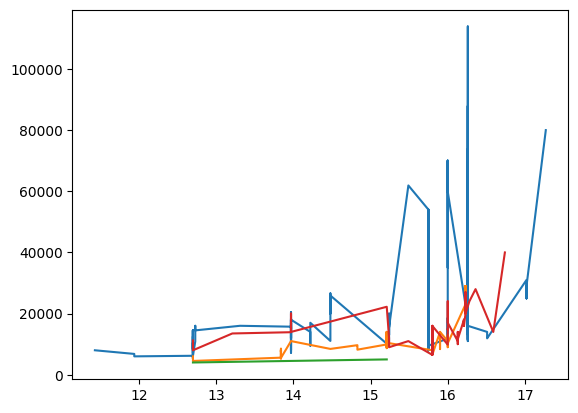

In [292]:
plt.plot(samsung_scrn.Screen_size, samsung_scrn.price_in_rupees)
plt.plot(redmi_scrn.Screen_size, redmi_scrn.price_in_rupees)
plt.plot(kult_scrn.Screen_size, kult_scrn.price_in_rupees)
plt.plot(vivo_scrn.Screen_size, vivo_scrn.price_in_rupees)
plt.show()

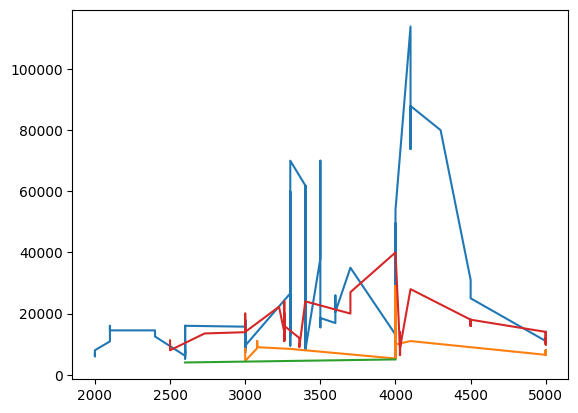

In [296]:
plt.plot(samsung_btr.Battery_details, samsung_btr.price_in_rupees)
plt.plot(redmi_btr.Battery_details, redmi_btr.price_in_rupees)
plt.plot(kult_btr.Battery_details, kult_btr.price_in_rupees)
plt.plot(vivo_btr.Battery_details, vivo_btr.price_in_rupees)
plt.show()

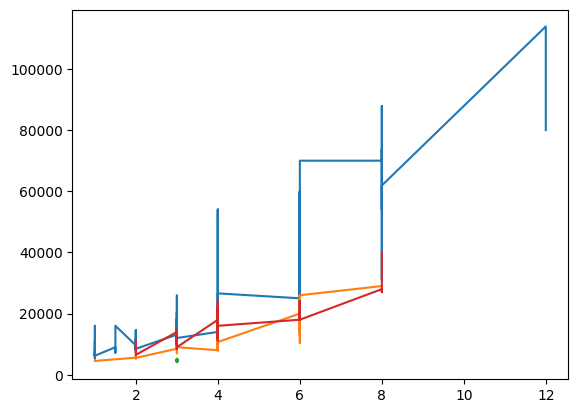

In [297]:
plt.plot(samsung_ram.RAM, samsung_ram.price_in_rupees)
plt.plot(redmi_ram.RAM, redmi_ram.price_in_rupees)
plt.plot(kult_ram.RAM, kult_ram.price_in_rupees)
plt.plot(vivo_ram.RAM, vivo_ram.price_in_rupees)
plt.show()

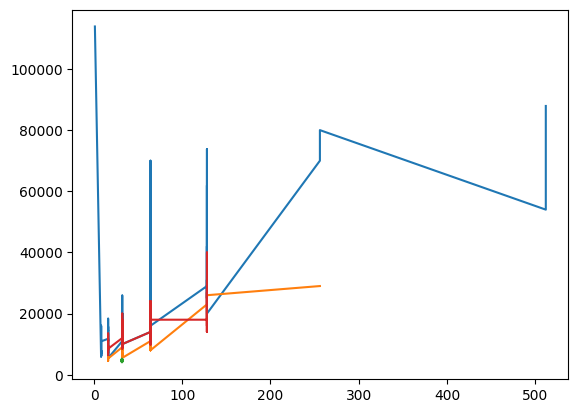

In [298]:
plt.plot(samsung_rom.ROM, samsung_rom.price_in_rupees)
plt.plot(redmi_rom.ROM, redmi_rom.price_in_rupees)
plt.plot(kult_rom.ROM, kult_rom.price_in_rupees)
plt.plot(vivo_rom.ROM, vivo_rom.price_in_rupees)
plt.show()

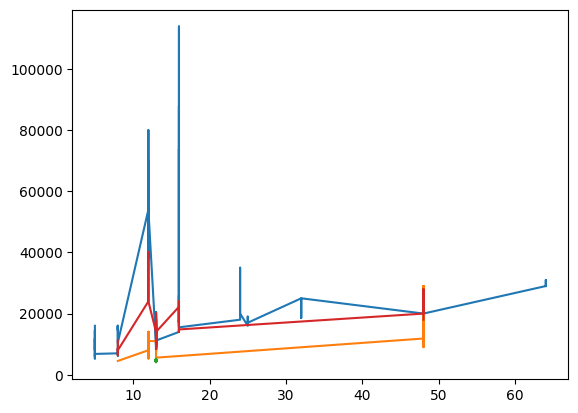

In [304]:
plt.plot(samsung_rc.Rear_camera, samsung_rc.price_in_rupees)
plt.plot(redmi_rc.Rear_camera, redmi_rc.price_in_rupees)
plt.plot(kult_rc.Rear_camera, kult_rc.price_in_rupees)
plt.plot(vivo_rc.Rear_camera, vivo_rc.price_in_rupees)
plt.show()